<h1>Project 1</h1>

<h1>Exploratory Data Analysis & Feature Engineering: Netmeds</h1>

*Netmeds is a licensed e-pharma portal that offers authenticated prescription and Over the Counter (OTC) medicine along with other health products.*

**Importing Essential Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

**Ignoring the warnings**

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Importing the Dataset**

In [3]:
df = pd.read_csv("C:/Users/muska/Desktop/Netmeds csv.csv")
df.head()

S. No.              Medicine Name   Category                 Composition   
0       1  Atrest 12.5mg Tablet 10'S    Tablets      TETRABENAZINE 12.5MG    \
1       2    Atrest 25mg Tablet 10'S    Tablets        TETRABENAZINE 25MG     
2       3       Capnea Injection 1ml  Injection    Caffeine Citrate 20 MG     
3       4       COGNIX + Tablet 10's    Tablets      GINKGO BILOBA 120 mg     
4       5      NOR 4mg Injection 2ml  Injection        NOREPINEPHRINE 4MG     

  Diagnosis     MRP Best_Price     Discount Discount %  
0      ADHD  154.04     123.23  0.200012984      20.00  
1      ADHD  261.49     209.19  0.200007648      20.00  
2      ADHD  277.38     249.64   0.10000721      10.00  
3      ADHD     117       93.6          0.2      20.00  
4      ADHD      56       50.4          0.1      10.00

**Getting the Datatypes in the dataset**

In [4]:
print(f'DataTypes in given dataset: \n{df.dtypes}')

DataTypes in given dataset: 
S. No.            int64
Medicine Name    object
Category         object
Composition      object
Diagnosis        object
MRP              object
Best_Price       object
Discount         object
Discount %       object
dtype: object


**Dropping the null values, if any**

In [6]:
df.dropna(inplace=True)

**Converting the column to numeric for jupyter to process it**

In [7]:
df['Best_Price'] = pd.to_numeric(df['Best_Price'], errors='coerce')

**Getting the memory usage of the dataset**

In [168]:
print(f'Memory usage in bytes: \n{df.memory_usage()}')

Memory usage in bytes: 
Index                     219400
S. No.                    219400
Medicine Name             219400
Category                  219400
Composition               219400
Manufacturer/Diagnosis    219400
MRP                       219400
Best_Price                219400
Discount                  219400
Discount %                219400
dtype: int64


**Getting all the information about the dataset**

In [169]:
print(f'Information about the given dataset: ')
print("")
print({df.info()})

Information about the given dataset: 

<class 'pandas.core.frame.DataFrame'>
Index: 27425 entries, 0 to 27444
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  27425 non-null  int64  
 1   Medicine Name           27425 non-null  object 
 2   Category                27425 non-null  object 
 3   Composition             27425 non-null  object 
 4   Manufacturer/Diagnosis  27425 non-null  object 
 5   MRP                     27425 non-null  object 
 6   Best_Price              25785 non-null  float64
 7   Discount                27425 non-null  object 
 8   Discount %              27425 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.1+ MB
{None}


**Obtaining the information about the column 'Category'**

In [170]:
df['Category']

0          Tablets
1          Tablets
2        Injection
3          Tablets
4        Injection
           ...    
27440        Cream
27441        Cream
27442        Cream
27443          Gel
27444        Cream
Name: Category, Length: 27425, dtype: object

**Getting the Columns in the dataset**

In [171]:
df.columns

Index(['S. No.', 'Medicine Name', 'Category', 'Composition',
       'Manufacturer/Diagnosis', 'MRP', 'Best_Price', 'Discount',
       'Discount %'],
      dtype='object')

**Changing the datatype for the 'BestPrice' Column which is essentially the selling price**

In [5]:
df['Best_Price'] = df['Best_Price'].str.replace(",", "").astype(float)

<h1>Univariate Analysis</h1>

*Helps in understanding the location/position of observations in the data variable, it's distribution, and dispersion.*

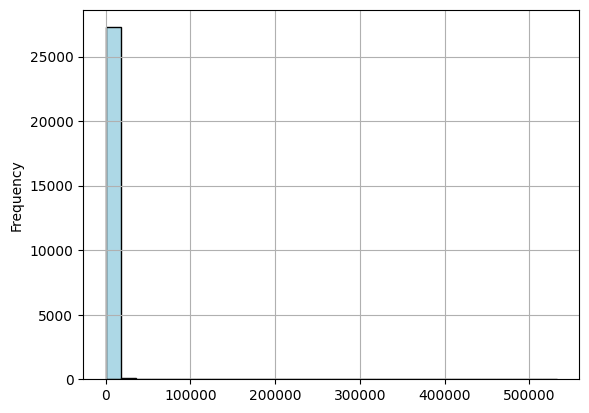

In [6]:
df['Best_Price'].plot(kind='hist',bins=30,color="lightblue", edgecolor ='black')
plt.grid()
plt.show()

*Displays the frequency count of the best price of the product sold.*

<Axes: ylabel='Frequency'>

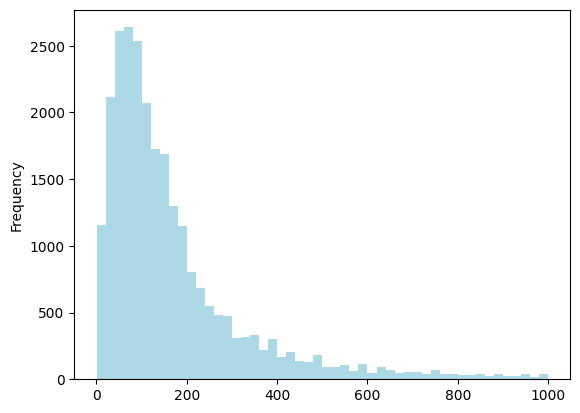

In [174]:
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')
df['MRP'] = df['MRP'].replace(",", "").astype("float")
df['MRP'].plot(kind = 'hist', bins = 50,color="lightblue")

*Displays the MRP of the products sold in a histogram.*

<Axes: xlabel='MRP', ylabel='Density'>

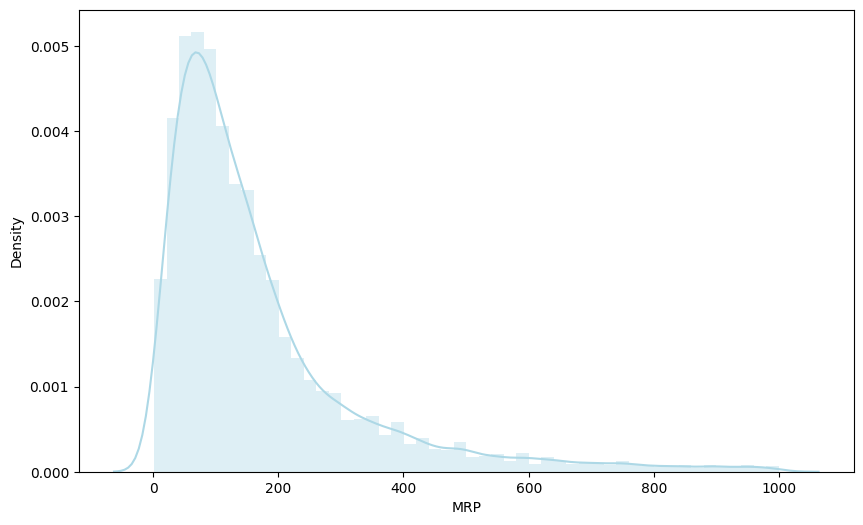

In [175]:
plt.figure(figsize=(10, 6))
sns.distplot(df['MRP'],color="lightblue")

*Displays the density of the MRP in a distribution graph.*

**Obtaining the value counts of each category.**

In [176]:
df['Category'].value_counts()

Category
Tablets      13629
Capsules      2894
Injection     2567
Cream         1256
Syrup         1228
             ...  
liquid           1
Massage          1
Corn Caps        1
Plaster          1
Tooth            1
Name: count, Length: 123, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

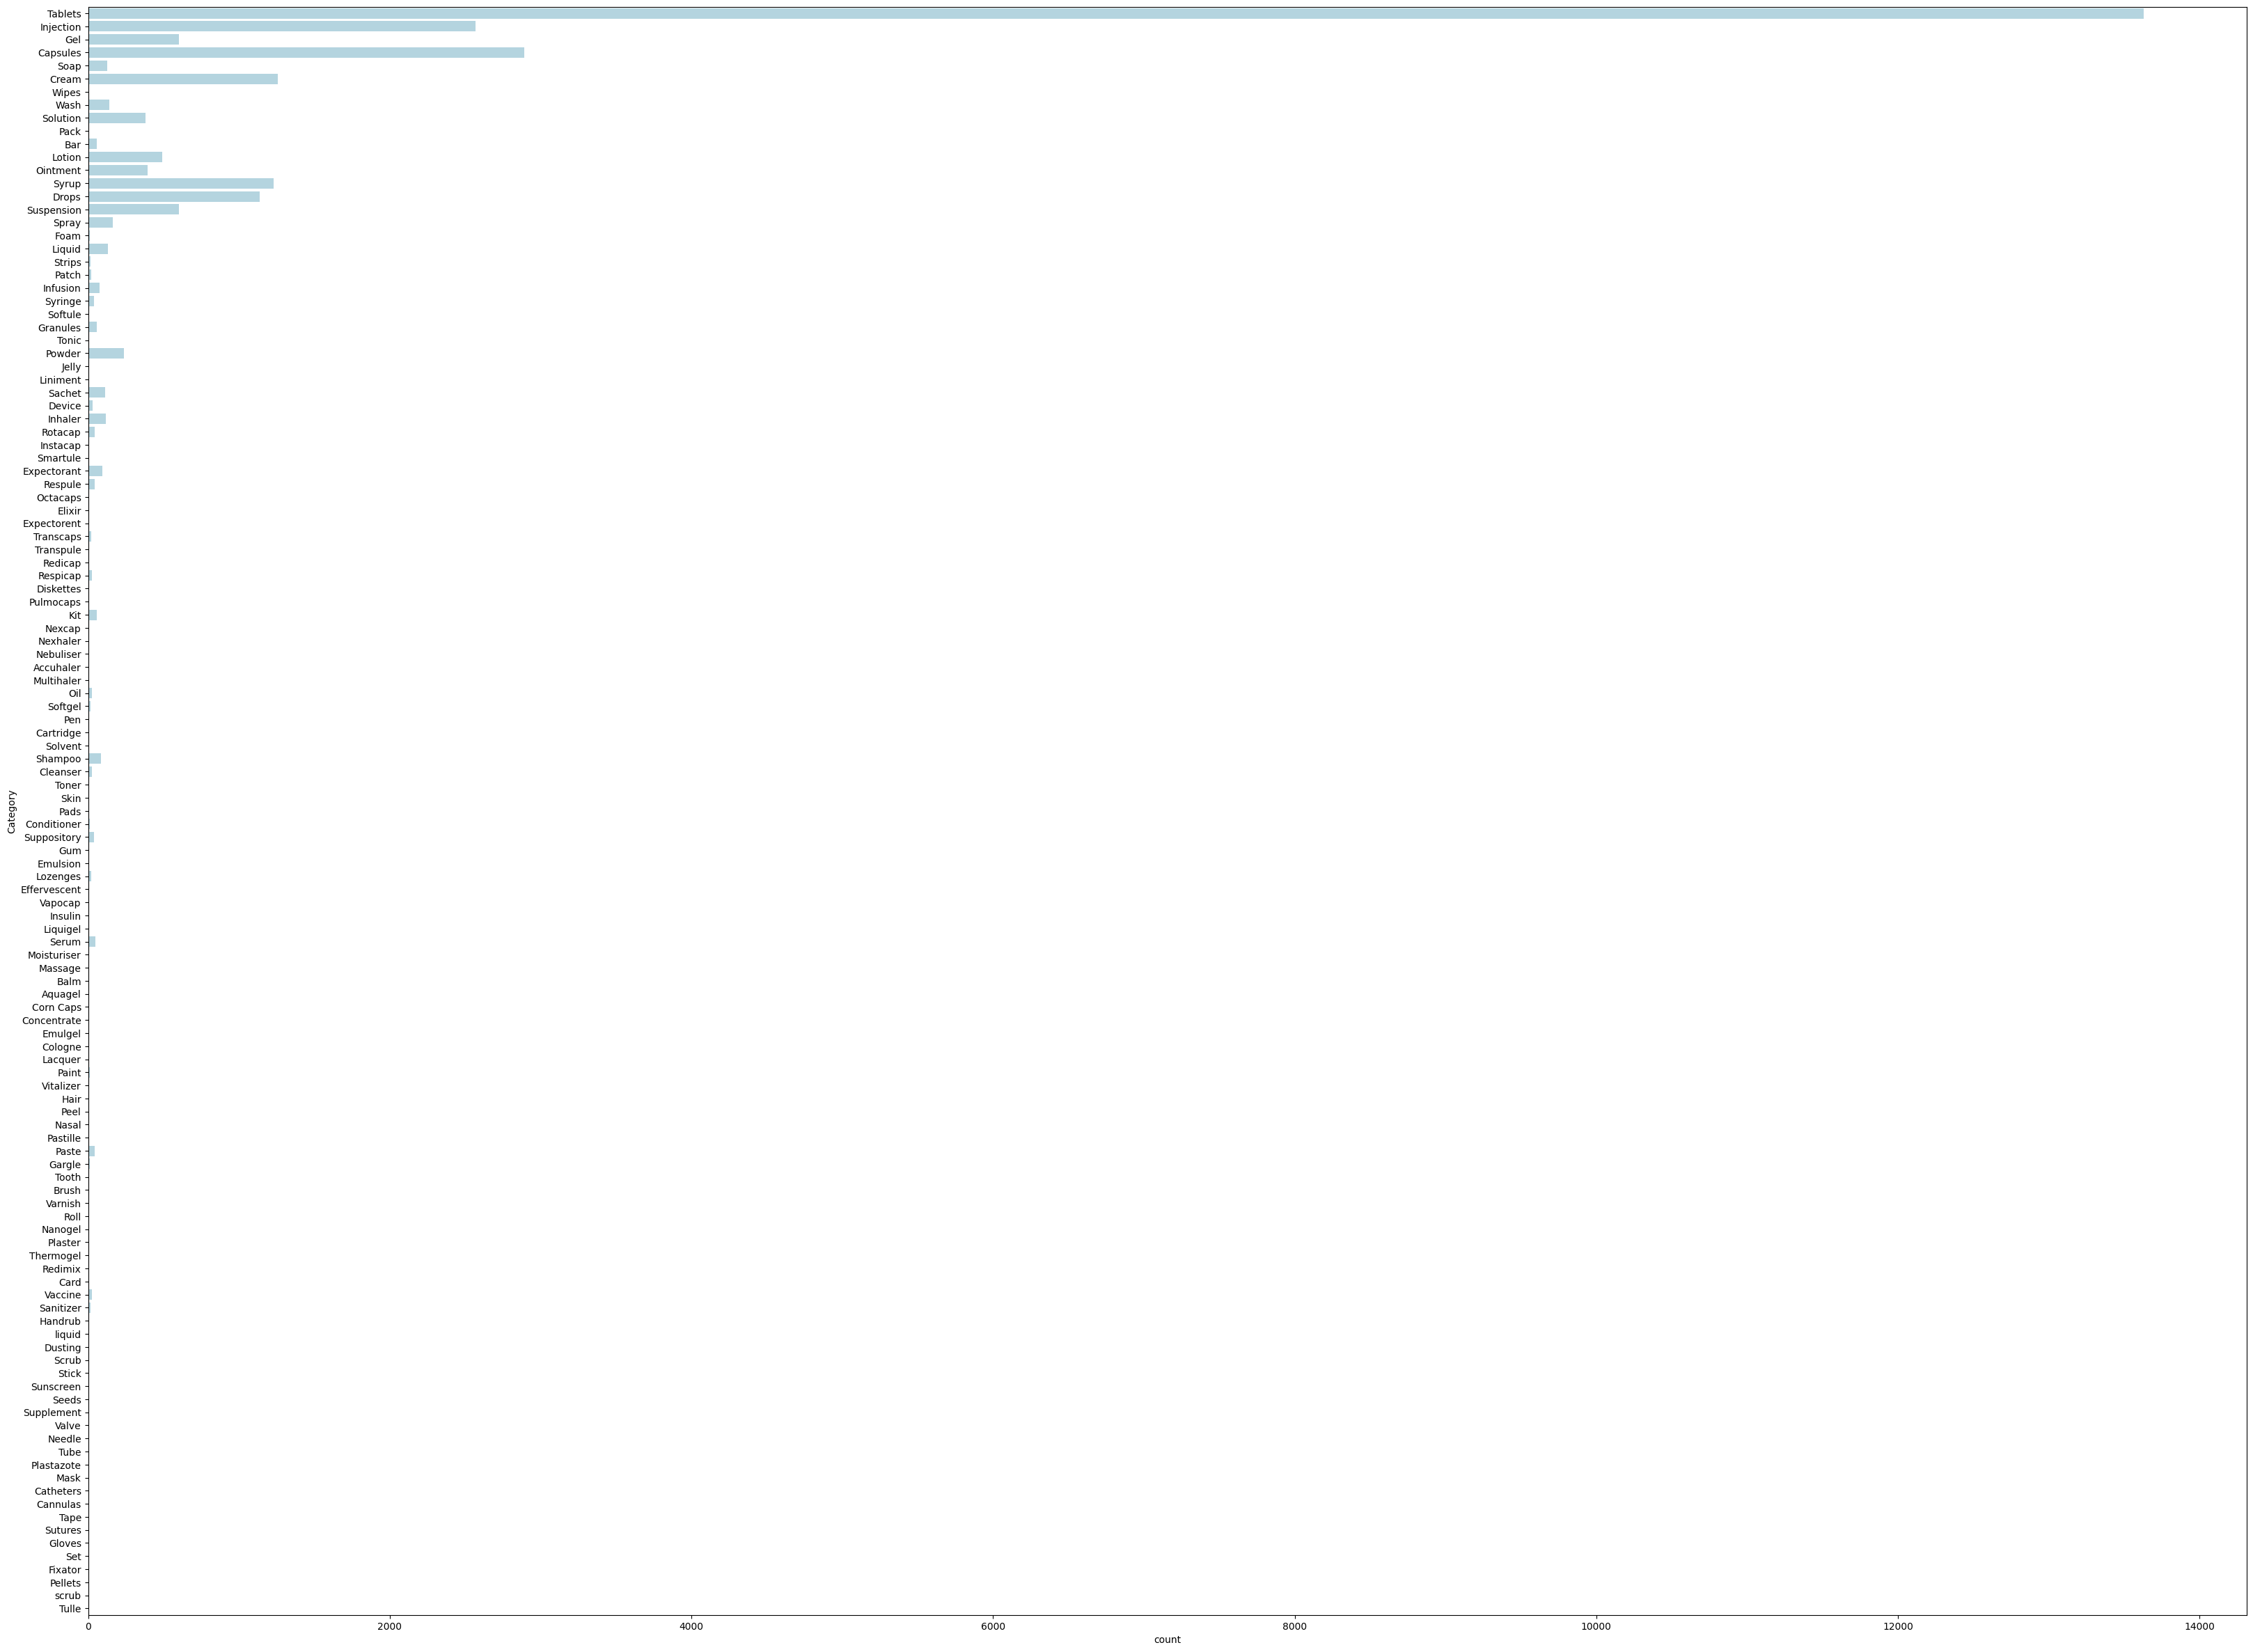

In [177]:
plt.figure(figsize=(40, 30))
sns.countplot(y = df['Category'], color = 'lightblue')


*Displays the count of each category of products sold by Netmeds in a horizontal bar graph.
We can see that Tablets have the high the count, followed by Capsule and Injection respectively.*

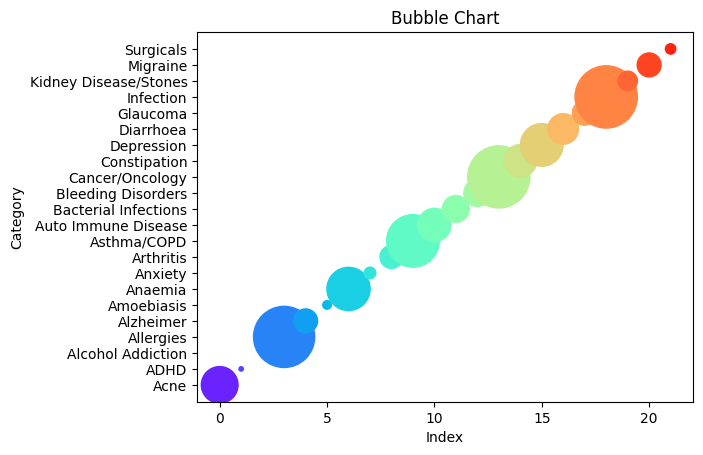

In [212]:
# Data
categories = ['Acne','ADHD','Alcohol Addiction','Allergies','Alzheimer','Amoebiasis','Anaemia',
              'Anxiety','Arthritis','Asthma/COPD','Auto Immune Disease','Bacterial Infections','Bleeding Disorders',
              'Cancer/Oncology','Constipation','Depression','Diarrhoea','Glaucoma','Infection','Kidney Disease/Stones',
              'Migraine','Surgicals']
counts = [349,5,11,969,149,19,484,35,137,717,287,186,190,1001,277,471,243,156,1006,99,148,28]

# Create a DataFrame
df = pd.DataFrame({'Category': categories, 'Count': counts})

# Set bubble sizes based on the counts
sizes = df['Count'] * 2

# Create a color palette
palette = sns.color_palette('rainbow', len(categories))

# Create the bubble chart with the color palette
plt.scatter(df.index, df['Category'], s=sizes, c=palette)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Category')
plt.title('Bubble Chart')

# Display the chart
plt.show()

*Displays the bubble chart grouped by the diagnosis of the patient corresponding to the count, which shows that 'Infection' as  a diagnosis had the biggest bubble of all, meaning that most number of patients came with this diagnosis. Next in line was 'Cancer/Oncology' with the second largest bubble, followed by Allergies.*

**Feature engineering the data to make sure that jupyter picks it up.**

In [5]:
df['MRP'] = df['MRP'].replace(",", "", inplace = True)

In [226]:
df['MRP'].fillna(0, inplace = True)

In [227]:
df['MRP']

0        0
1        0
2        0
3        0
4        0
        ..
27440    0
27441    0
27442    0
27443    0
27444    0
Name: MRP, Length: 27445, dtype: int64

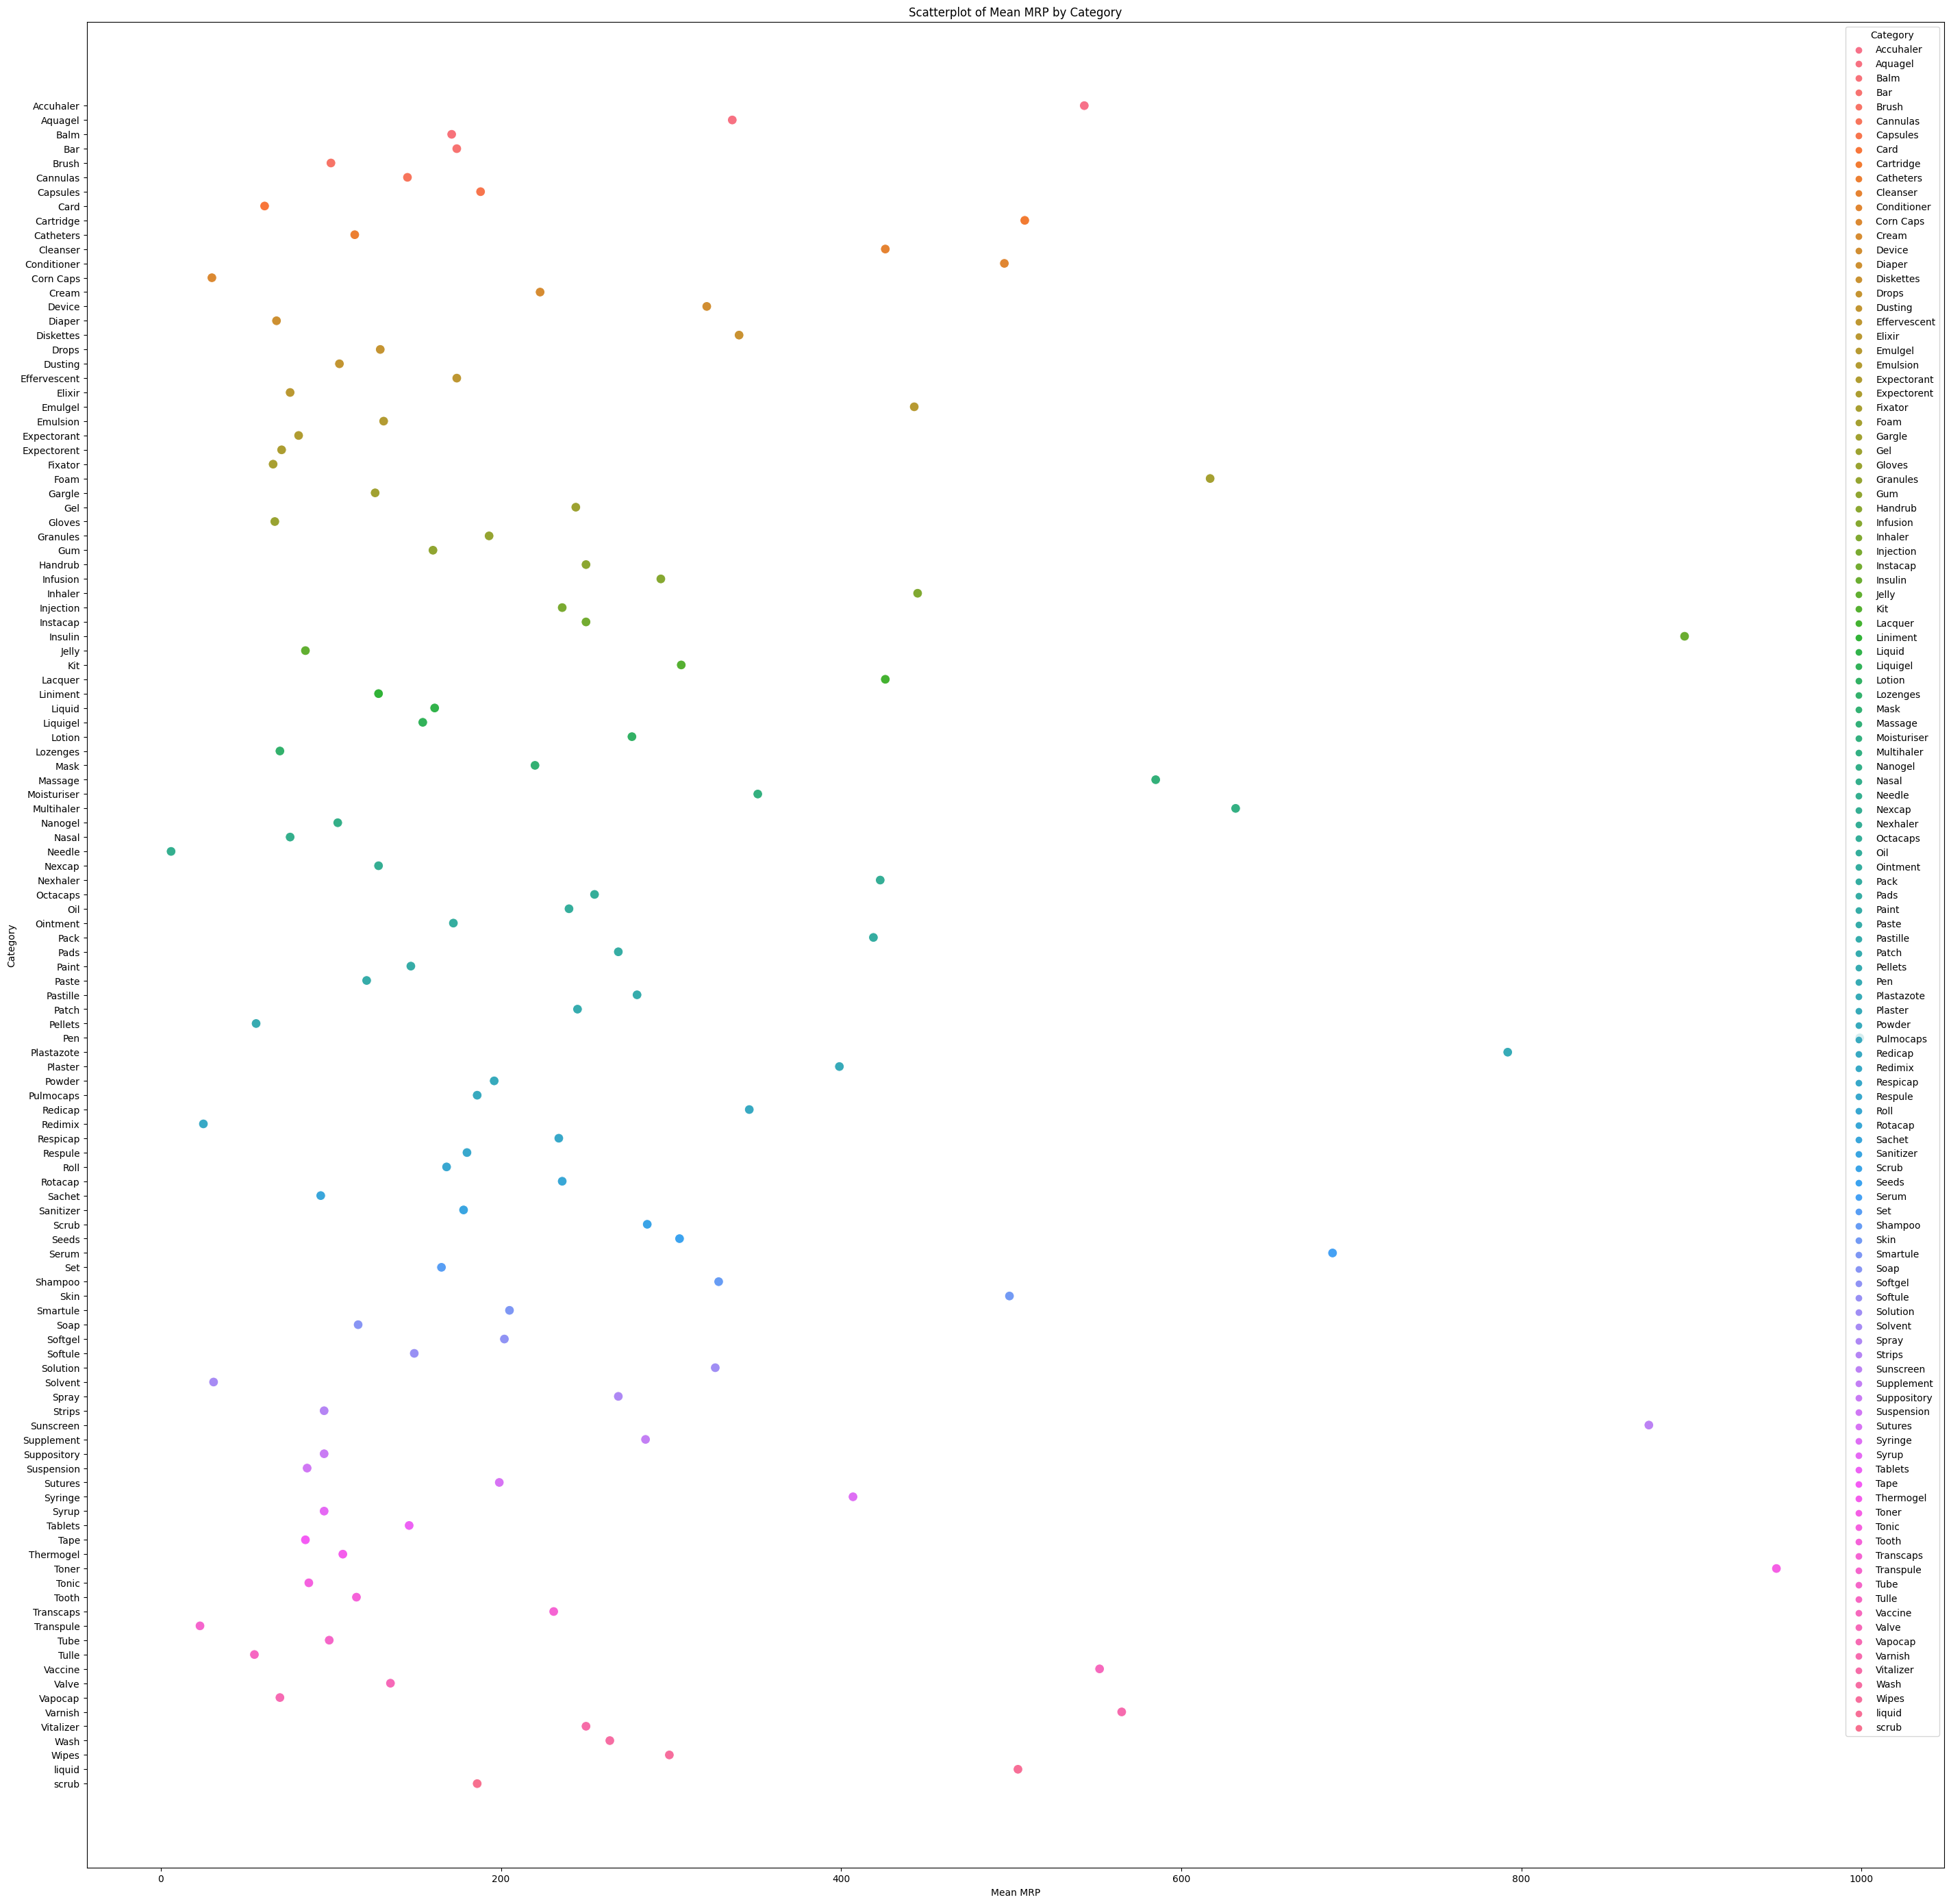

In [25]:
# Convert 'MRP' column to numeric data type
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')

# Exclude non-finite values
df_cleaned = df.dropna(subset=['MRP'])

# Calculate the mean MRP per category
mean_mrp = df_cleaned.groupby("Category")["MRP"].mean().astype(int)

# Plotting the scatterplot
plt.figure(figsize=(35, 35))
sns.scatterplot(x=mean_mrp.values, y=mean_mrp.index, hue=mean_mrp.index,s=100)
plt.xlabel("Mean MRP")
plt.ylabel("Category")
plt.title("Scatterplot of Mean MRP by Category")
plt.show()


*Displays the scatter plot of the mean values of MRP grouped by categories such that it represents the equivalent and corresponding mean MRP of each category as a dot across the plot.We can see that the 'Toner' has the maximum mean MRP by it's correspinding dot.*

<h1>Bivariate & Multivariate Analysis</h1>

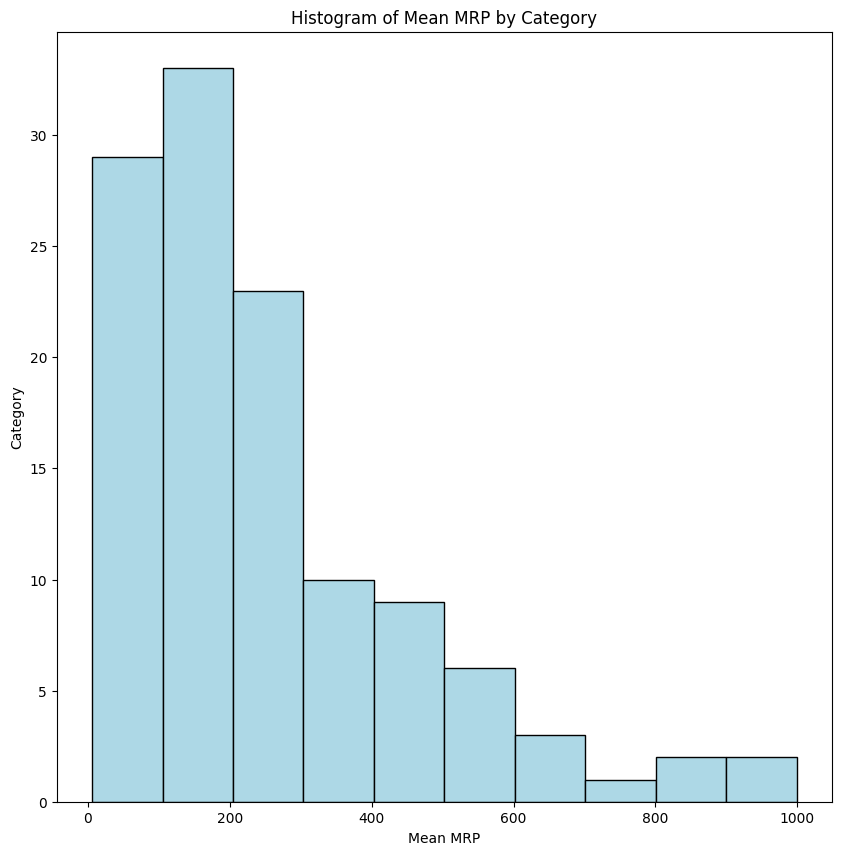

In [13]:
# Convert 'MRP' column to numeric data type
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')

# Exclude non-finite values
df_cleaned = df.dropna(subset=['MRP'])

# Calculate the mean MRP per category
mean_mrp = df_cleaned.groupby("Category")["MRP"].mean().astype(int)

# Plotting the scatterplot
plt.figure(figsize=(10, 10))
plt.hist(x=mean_mrp.values,bins=10, edgecolor='black',color='lightblue')
plt.xlabel("Mean MRP")
plt.ylabel("Category")
plt.title("Histogram of Mean MRP by Category")
plt.show()


*Displays the mean MRP classified by category, this graph considers the categories as integers because of it being feature engineered earlier. But what we can meaningfully interpret form this is that the maximum amount of products have a MRP between 100 and 200, and the least products have the MRP between 700 and 800 (rupees).*

In [4]:
df['MRP'].dropna(axis = 0, inplace = True)

In [ ]:
df['MRP'].isnull().sum()

In [ ]:
df['MRP'].dtype

In [ ]:
df['Category'] = df['Category'].astype('category')

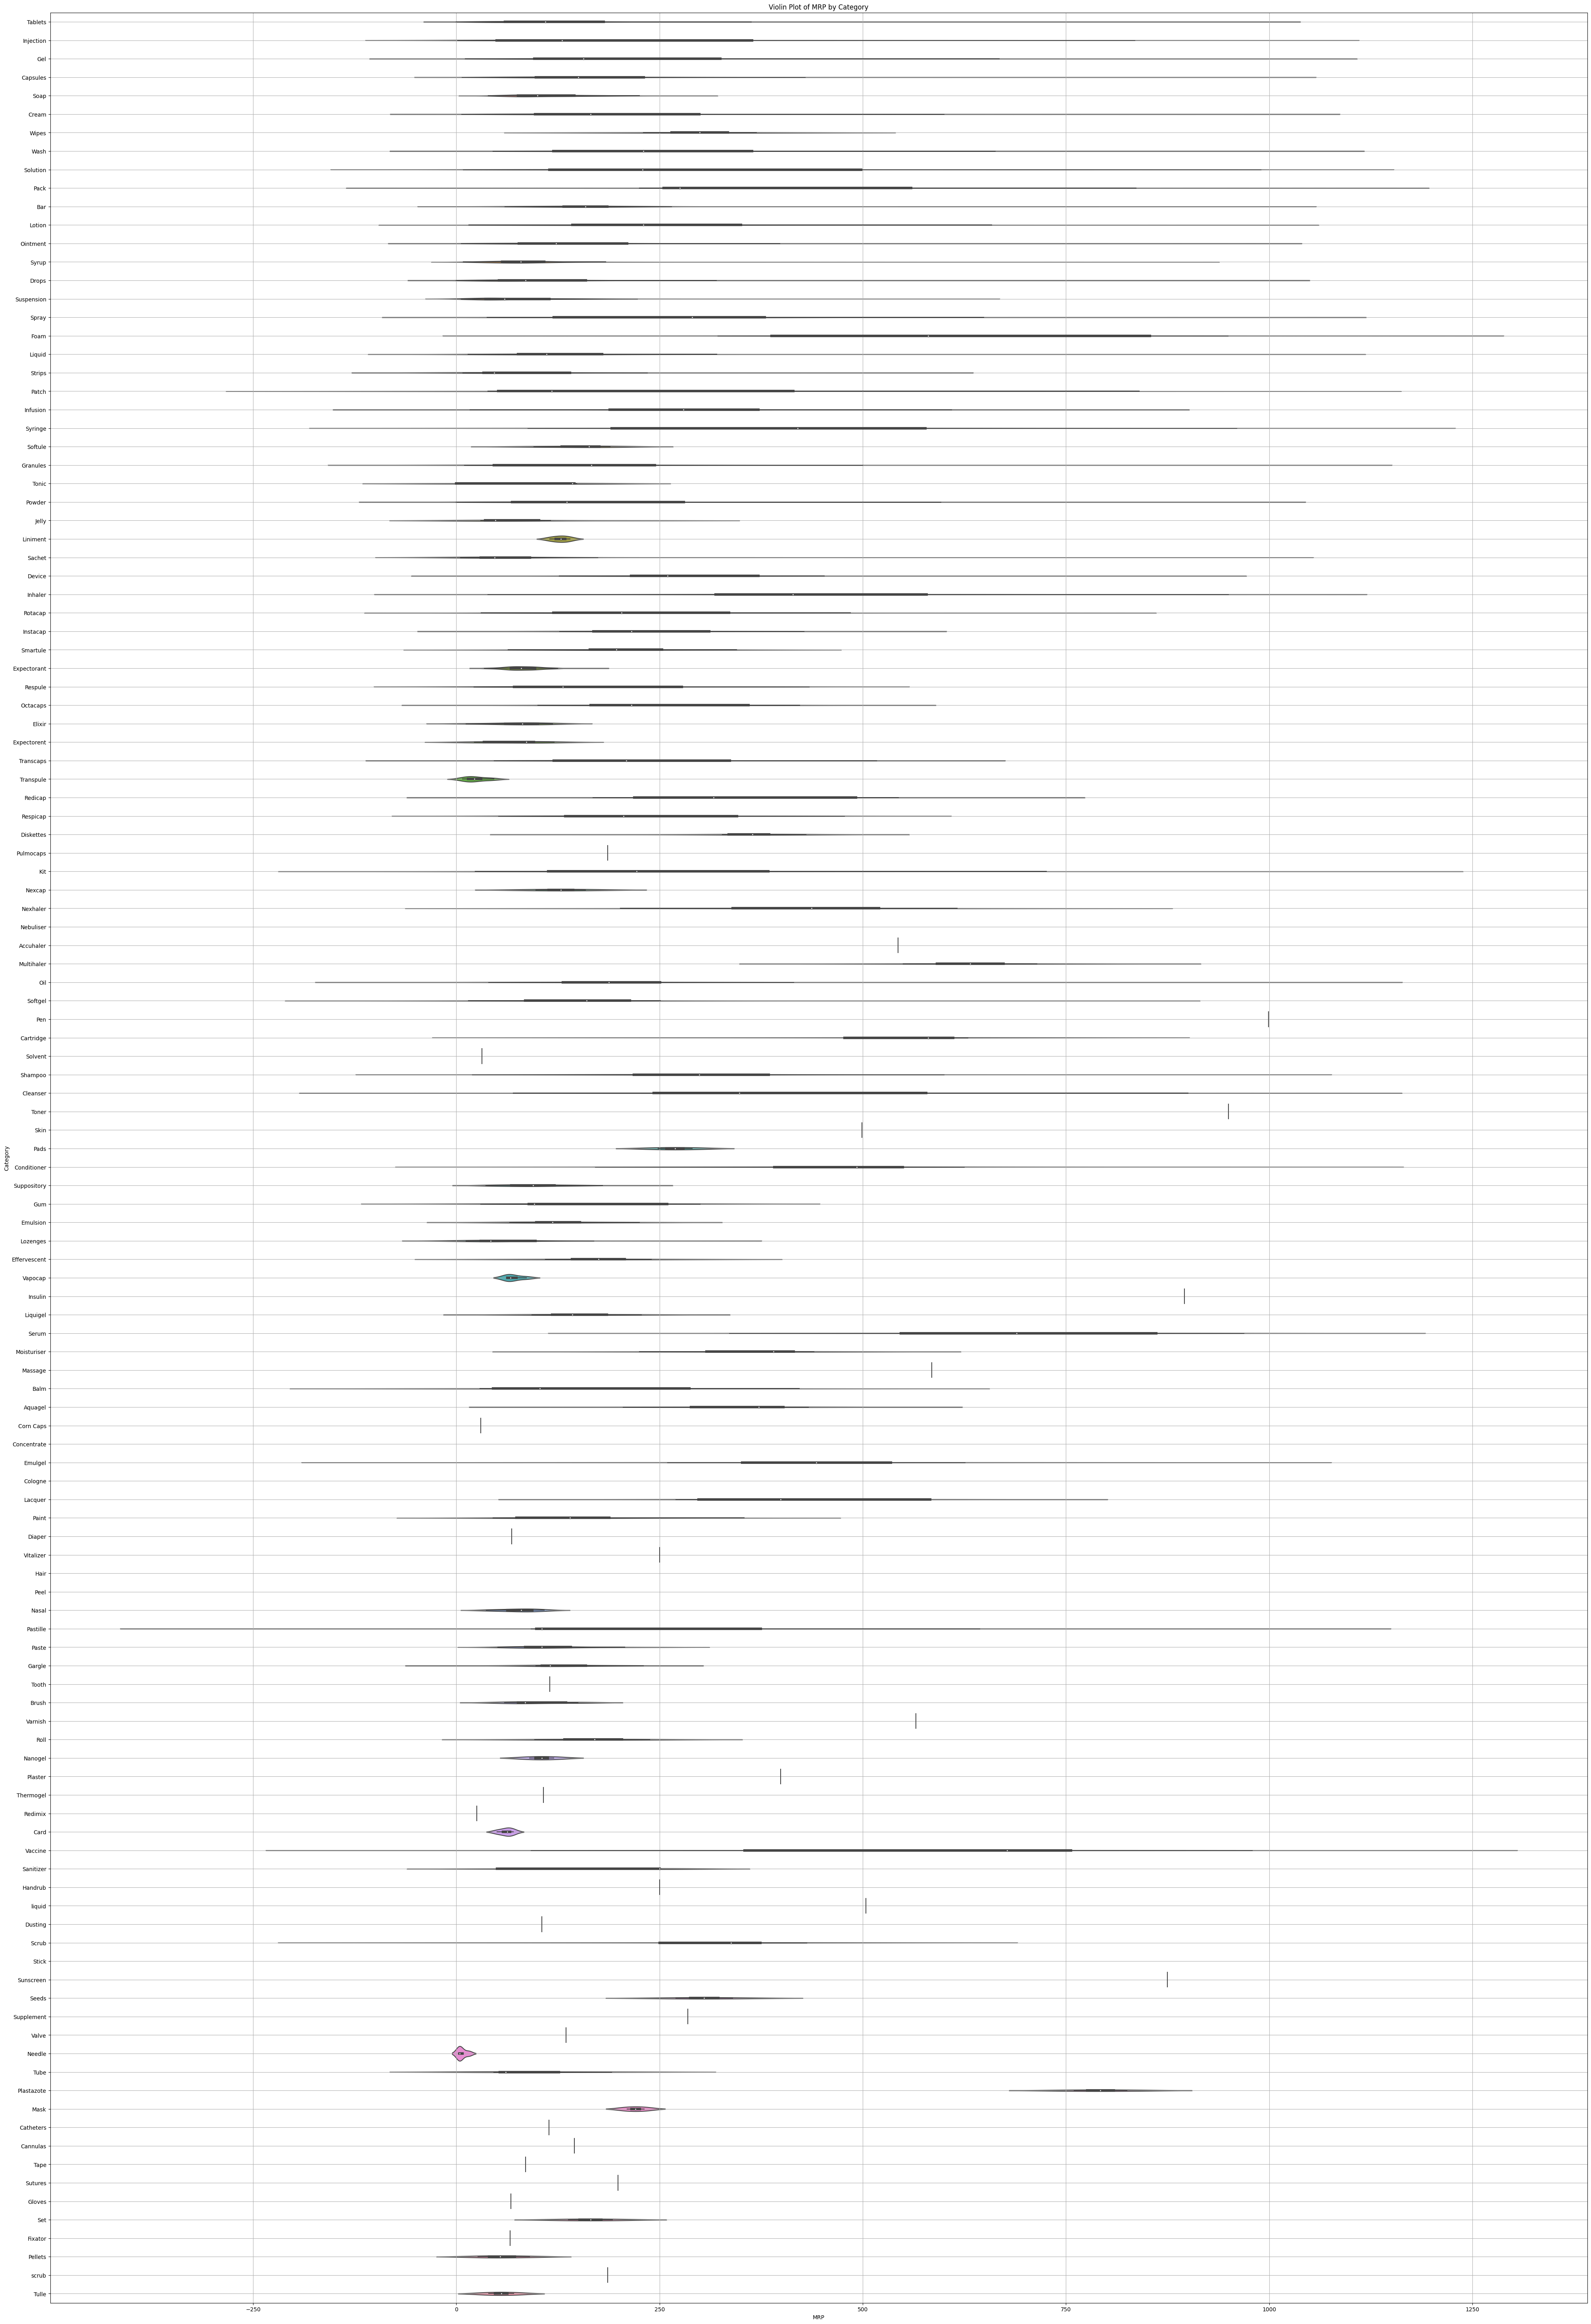

In [10]:
# Plotting the violin plot
plt.figure(figsize=(50, 75))
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')

sns.violinplot(y=df['Category'], x=df['MRP'])
plt.xlabel("MRP")
plt.ylabel("Category")
plt.title("Violin Plot of MRP by Category")
plt.grid()
plt.show()


*Displays a violin plot of different categories corresponding to the MRP of the products.The thicker the violin, the more its' MRP is. We can see that 'Needle' has the thickest violin. This is followed by card, vapocap and Liniment with their MRPs being higher than the rest of the product categories.*

In [30]:
px.scatter(x=df['Category'],y=df['Best_Price'], color = df['Discount %'],color_discrete_sequence=px.colors.qualitative.Alphabet)

![Plot Image](newplot.png)

*Displays a scatter plot of the best price/ selling price marked by the categories in the colour. We can see that this graph has a very clear outlier in the category 'Infusion'. And, 'Inhaler' and 'Liniment' also have higher end pricing.*

In [35]:
import plotly.express as px

fig = px.scatter(df, x='MRP', y='Discount %', color='Category', color_discrete_sequence=px.colors.qualitative.Alphabet,
                 width=800, height=600)

fig.show()


*Displays a scatter plot of MRP of the products correponding to the Discount %, colour coded by the categories. We can see that the maximum discount offered is for Tablets and we have an outlier (wrong data entered/ data anomaly) for one entry for the product 'Disaper'.*

![Plot Image](newplot(1).png)

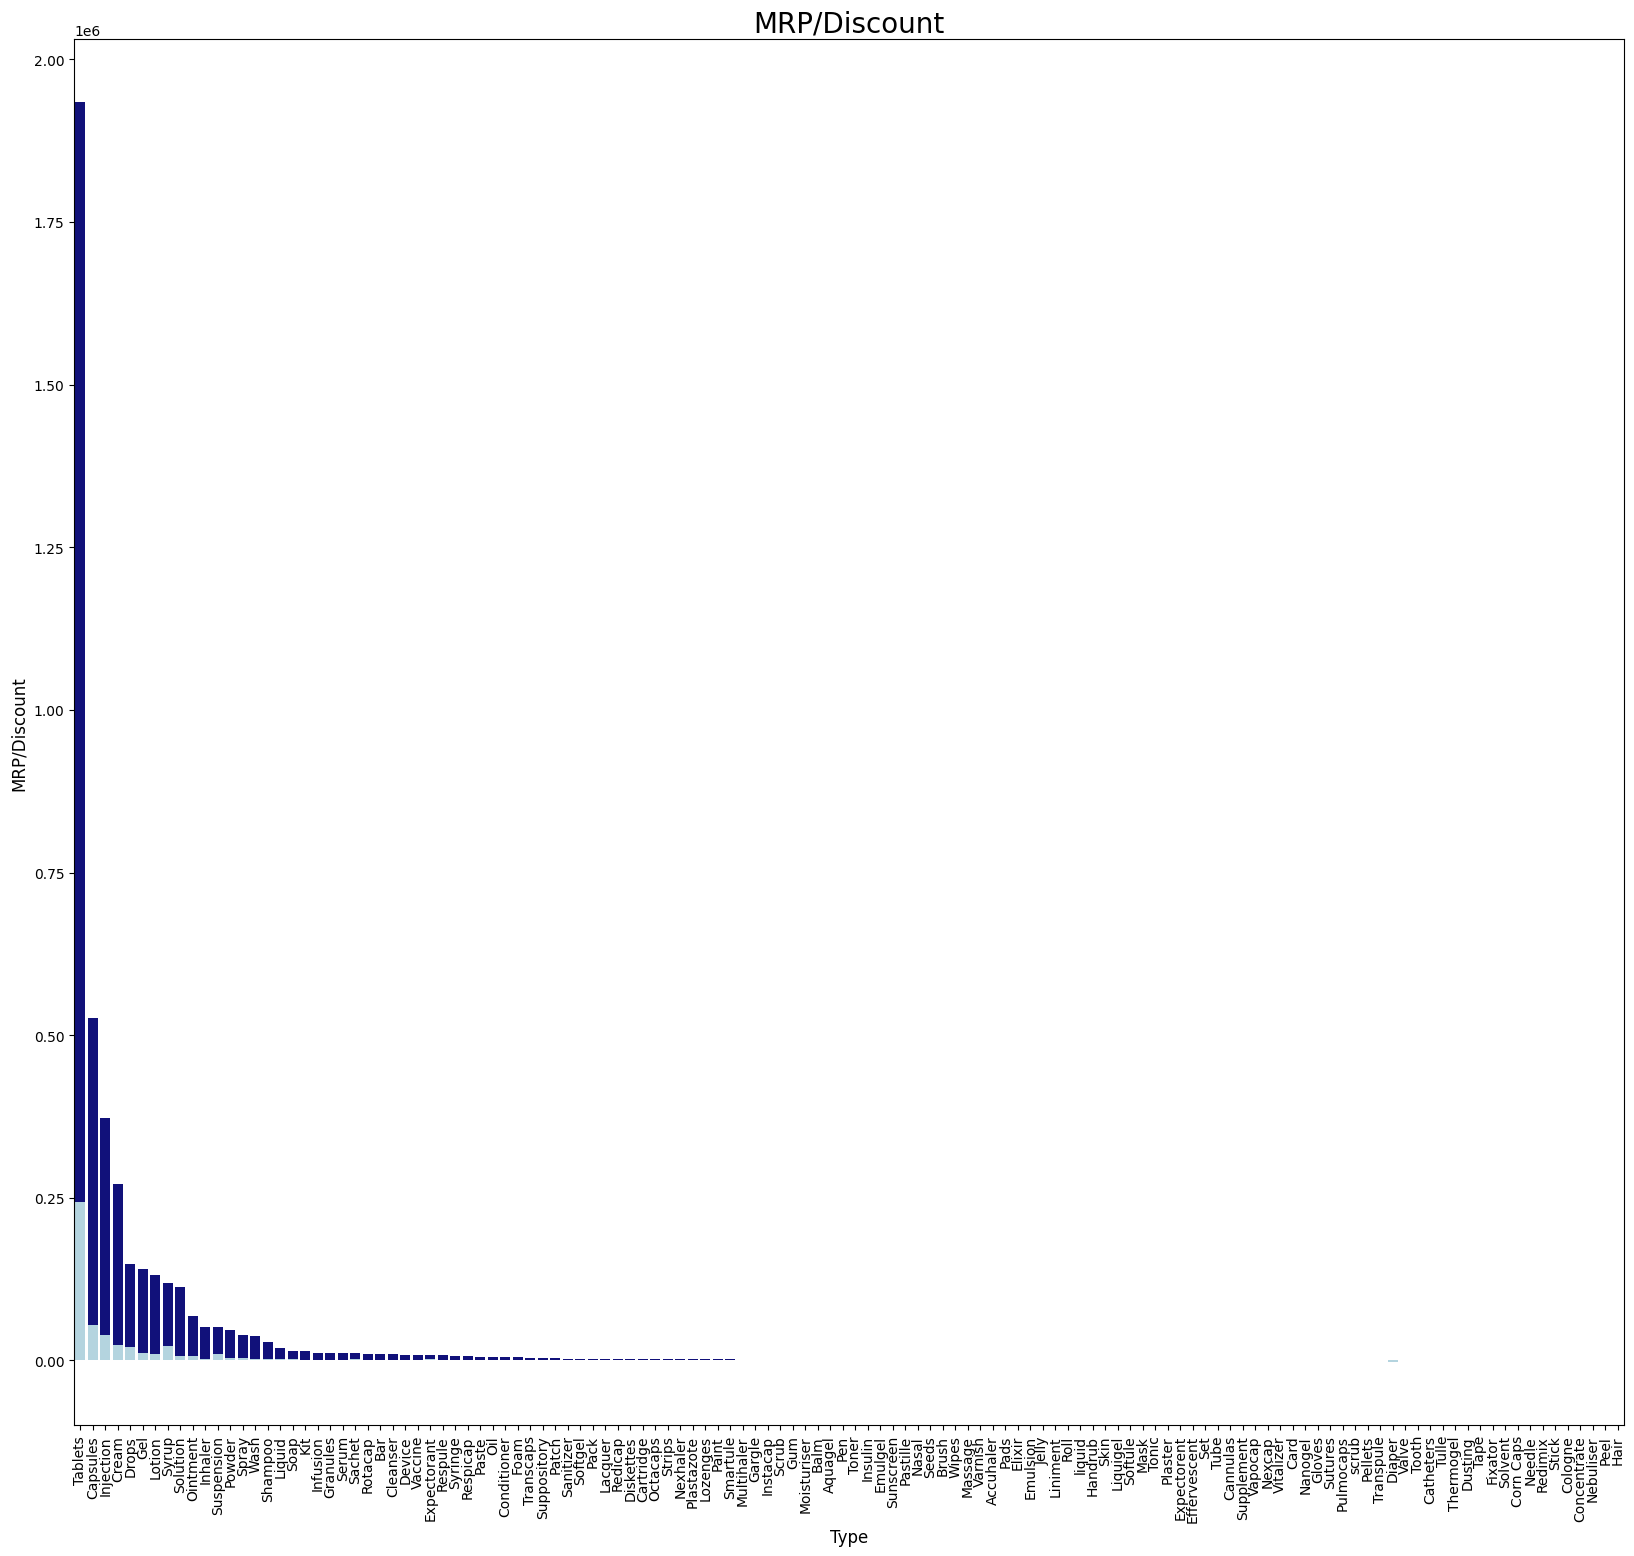

In [40]:
# Remove missing values from 'MRP' and 'Discount %' columns
df['MRP'].dropna(axis=0, inplace=True)
df['Discount %'].dropna(axis=0, inplace=True)

# Convert 'MRP' and 'Discount %' columns to numeric type
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')
df['Discount %'] = pd.to_numeric(df['Discount %'], errors='coerce')

# Group by 'Category' and calculate the sum of 'MRP' and 'Discount %'
ps = df.groupby('Category')[['MRP', 'Discount %']].sum().sort_values(by='MRP', ascending=False)

# Reset the index of the DataFrame
ps.reset_index(inplace=True)

# Plot the bar chart using seaborn
plt.figure(figsize=(20, 18))
sns.barplot(x='Category', y='MRP', data=ps, color='darkblue')
sns.barplot(x='Category', y='Discount %', data=ps, color='lightblue')

plt.title('MRP/Discount', fontsize=20)
plt.xlabel('Type', fontsize=12)
plt.ylabel('MRP/Discount', fontsize=12)
plt.xticks(rotation=90)

plt.show()


*Displays the Category of the product corresponding to the MRP along with the discount that is being offered on each category. We can see that the highest discount is offered in tablets by Netmeds, followed by capsules.*